In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
import numpy as np
import seaborn as sns

import warnings, joblib
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('../output/deliveries_final.csv')
df.head()

,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",13,271,8,2.689655,13.0,268
1,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",13,270,8,2.600000,13.0,268
2,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",14,269,8,2.709677,14.0,268
3,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",15,268,8,2.812500,15.0,268
4,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",16,267,8,2.909091,16.0,268


In [34]:
df.shape

(348500, 9)

#### Correlation Matrix

<Axes: >

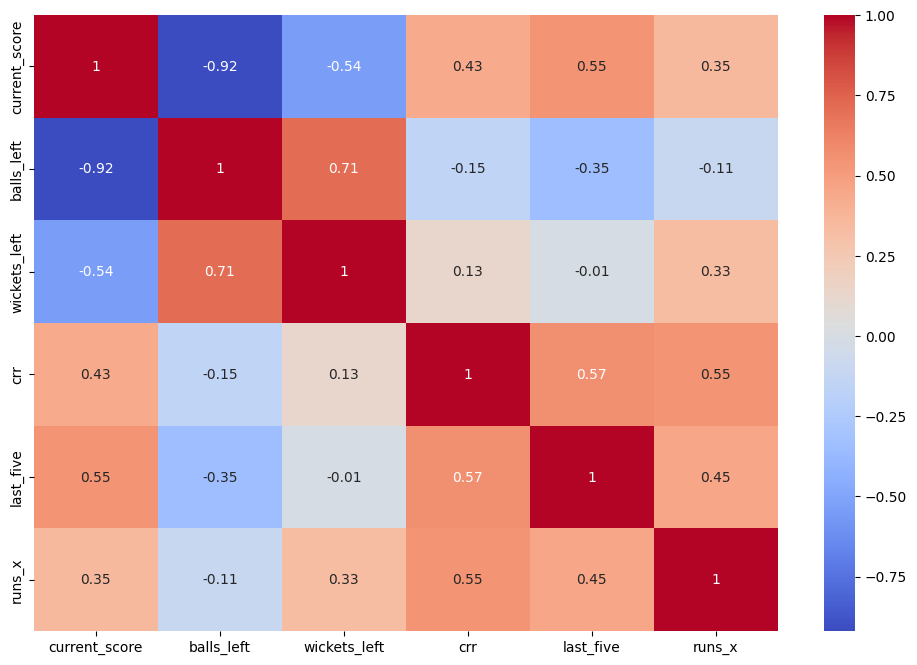

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [36]:
corr_with_target = df.corr()['runs_x'].sort_values(ascending=False)
corr_with_target

runs_x           1.000000
crr              0.549752
last_five        0.454732
current_score    0.353008
wickets_left     0.326548
balls_left      -0.106696
Name: runs_x, dtype: float64

#### XGBRegressor Model

In [37]:
from xgboost import XGBRegressor

In [38]:
# Train Test Split
X = df.drop(columns=['runs_x'])
y = df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
# One Hot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
clm = ColumnTransformer([('clm',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),['batting_team','bowling_team','venue'])
                        ],remainder='passthrough')

In [40]:
pipe_xgb = Pipeline(steps=[
    ('step1',clm),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [41]:
pipe_xgb.fit(X_train,y_train) # 7 mins

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('clm',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'venue'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsampl...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [42]:
y_pred_xgb = pipe_xgb.predict(X_test)
print(r2_score(y_test,y_pred_xgb))
print(mean_absolute_error(y_test,y_pred_xgb))

0.9881137609481812
2.720057725906372


In [43]:
input_df = pd.DataFrame({'batting_team': ['Australia'],
'bowling_team': ['Pakistan'],
'venue': ['Brisbane Cricket Ground, Woolloongabba'],
'current_score': [14],
'balls_left':[269],
'wickets_left':[8],
'crr':[2.709677],
'last_five':[14.0]})

input_df

,batting_team,bowling_team,venue,current_score,balls_left,wickets_left,crr,last_five
0,Australia,Pakistan,"Brisbane Cricket Ground, Woolloongabba",14,269,8,2.709677,14.0


In [44]:
result_test = pipe_xgb.predict(input_df)
result_test

array([268.12436], dtype=float32)

In [46]:
joblib.dump(pipe_xgb, '../output/pipe_xgb_model.pkl')

['../output/pipe_xgb_model.pkl']